In [2]:
# idealised population distribution
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
def binomial(n):
    if n == 1:
        return((1,1))
    else:
        a = binomial(n-1)
        b = np.zeros(len(a) + 1)
        b[0] = a[0]
        b[len(b)-1] = a[len(a)-1]
        for i in range(len(a)-1):
            b[i+1] = a[i] + a[i+1]
        return b

In [4]:
binomial(6)

array([ 1.,  6., 15., 20., 15.,  6.,  1.])

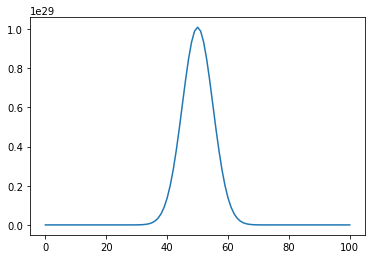

In [5]:
d = binomial(100)
dx = np.arange(0,len(d))
plt.plot(dx,d)
plt.show;

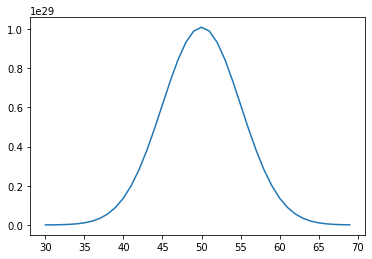

In [6]:
plt.plot(dx[30:70],d[30:70])
plt.show;

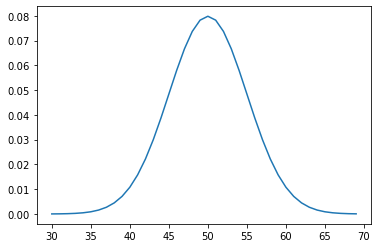

In [7]:
mean = 50
sd = 5

# x-axis for the plot
xaxis = np.arange(30, 70, 1)
# y-axis for the plot
yaxis = stats.norm.pdf(xaxis, 50, 5)
# plot ideal population
plt.plot(xaxis, yaxis)
plt.show()

[49.5142955459695, 49.99044808158058, 49.93733713847749, 50.84613075484407, 50.19624519869445, 50.64805329128006, 50.128090693689586, 50.05667829382229, 50.13885495356577, 50.11784067343654, 50.06105556593778, 50.1064086152117, 49.92704653716937, 50.04810794729922, 50.009258950250555, 50.03331720738912, 50.00143044024181, 50.02681084917128, 50.018133207658536, 50.00365367125419]


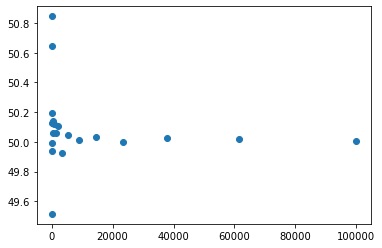

In [8]:
# demonstrate the law of large numbers

# seed the random number generator
np.random.seed(1)

# sample sizes
sizes = np.logspace(1, 5, 20)

# generate samples of different sizes and calculate their means
means = [np.mean(5 * np.random.randn(int(size)) + 50) for size in sizes]
print(means)

# plot sample mean error vs sample size
plt.scatter(sizes, np.array(means))
plt.show()


In [9]:
nums_per_line = 5
print("Table of errors ", nums_per_line, " entries per line")
for i in range(0, len(means), nums_per_line):
    for j in range(i, min(i+nums_per_line, len(means))):
        print('%.3f'%np.abs(50-means[j]),end=' ')
    print()

Table of errors  5  entries per line
0.486 0.010 0.063 0.846 0.196 
0.648 0.128 0.057 0.139 0.118 
0.061 0.106 0.073 0.048 0.009 
0.033 0.001 0.027 0.018 0.004 


In [10]:
# generate random dice rolls

# seed the random number generator
np.random.seed(1)

# generate a sample of die rolls
rolls = np.random.randint(1, 7, 50)
print(rolls)
print(np.mean(rolls))


[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4 5 3 5 6 3 5 2 2 1 6 2 2 6 2 2 1 5
 2 1 1 6 4 3 2 1 4 6 2 2 4]
3.44


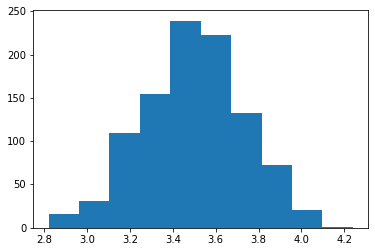

In [11]:
# demonstration of the central limit theorem

# seed the random number generator
np.random.seed(1)

# calculate the mean of 50 dice rolls 1000 times
means = [np.mean(np.random.randint(1, 7, 50)) for _ in range(1000)]

# plot the distribution of sample means
plt.hist(means)
plt.show()


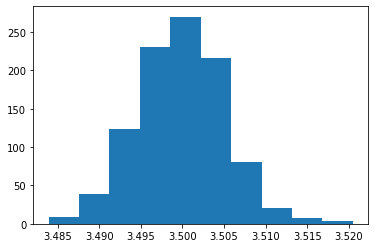

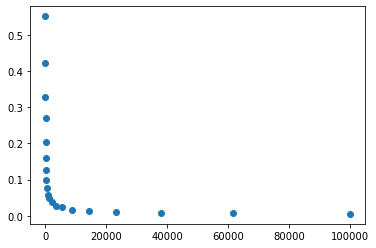

In [12]:
#combination of CLT and Law of large numbers

stds = []
for size in sizes:
    means = [np.mean(np.random.randint(1, 7, int(size))) for _ in range(1000)]
    stds.append(np.std(means))

plt.hist(means)
plt.show()

plt.scatter(sizes, np.array(stds))
plt.show()    

In [13]:
#flip coin 6 times and count number heads
#heads = 1 tails = 0
# repeat multiple times and get the distribution

idealdist = binomial(6)
print(idealdist)

for size in sizes:
    totals = np.zeros(7,dtype=int)
    for i in range(int(size)):
        totals[np.random.randint(0,2,6).sum()] += 1
    dist = (totals * 64) / totals.sum()
    print( f'size %s, variance %0.2f'%(int(size),((dist-idealdist)**2).sum()) )


[ 1.  6. 15. 20. 15.  6.  1.]
size 10, variance 401.76
size 16, variance 436.00
size 26, variance 10.20
size 42, variance 68.93
size 69, variance 13.59
size 112, variance 23.10
size 183, variance 19.61
size 297, variance 23.92
size 483, variance 7.35
size 784, variance 1.36
size 1274, variance 1.17
size 2069, variance 1.52
size 3359, variance 0.34
size 5455, variance 1.42
size 8858, variance 0.20
size 14384, variance 0.22
size 23357, variance 0.21
size 37926, variance 0.03
size 61584, variance 0.06
size 100000, variance 0.01


# Chebyshev Inequality

In [14]:
def expected_value(values, probabilities):
    return (values * probabilities).sum()

xs = (1, 2, 3, 4, 5, 6)
probabilities = np.repeat(1/len(xs),len(xs))

print("Expected value of roll is ", expected_value(xs, probabilities))


Expected value of roll is  3.5


In [19]:
def variance(values, probabilities):
    m = expected_value(values, probabilities)
    return sum((values - m)**2 * probabilities)

In [16]:
print("Variance of roll is ", variance(xs, probabilities))

Variance of roll is  2.9166666666666665


In [17]:
a = 2

e_v = expected_value(xs, probabilities)
interval_start = e_v - a
interval_end = e_v + a

probability = (probabilities * ( (xs < interval_start) + (xs > interval_end ) ) ).sum()
varoverasq = variance(xs,probabilities)/(a**2)

print("Probability of roll more than ",a, " from expected value is ",probability)
print("Variance of roll divided by ",a, " squared is ", varoverasq)
print("Which fits Chebyshev inequality as ",probability ,"<=",varoverasq)

Probability of roll more than  2  from expected value is  0.3333333333333333
Variance of roll divided by  2  squared is  0.7291666666666666
Which fits Chebyshev inequality as  0.3333333333333333 <= 0.7291666666666666


In [18]:
def uniformoutside(sd, low=0, high =1):
    mean = (low + high/2)
    std = np.sqrt((1/12) * (high-low) ** 2)
    sdlow = mean - std * sd
    probs = 2 * (sdlow-low) / (high - low)
    return (probs - probs * ( probs<0))

sdlist = np.linspace(1,4,10)
print(uniformoutside(sdlist))
uniformoutside(sdlist) < (1 / sdlist**2)    

[0.42264973 0.23019964 0.03774955 0.         0.         0.
 0.         0.         0.         0.        ]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [20]:
def normoutside(n):
    return(2*(1-stats.norm.cdf(n)))
sdlist = np.linspace(1,4,10)
print(normoutside(sdlist))
normoutside(sdlist) < (1 / sdlist**2)

[3.17310508e-01 1.82422439e-01 9.55807045e-02 4.55002639e-02
 1.96306573e-02 7.66076114e-03 2.69979606e-03 8.58120666e-04
 2.45732780e-04 6.33424837e-05]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [21]:
def gammaoutside(sd, n, scale =1):
    rate = 1 / scale
    t = np.linspace(0,10*n/rate,10000); 
    p = stats.gamma.pdf(t,n,scale=time_constant); # compute the PDF.
    mean = (t*p).sum()/p.sum()
    std = np.sqrt(((t-mean)**2 * p).sum()/p.sum())
    sdlow = mean - std * sd
    sdhigh = mean + std * sd
    abovehigh = 1 - stats.gamma.cdf(sdhigh,n,scale=scale)
    belowlow = stats.gamma.cdf(sdlow,n,scale=scale)
    probs = abovehigh + belowlow
    return (probs - probs * ( probs<0))

rate = 5.0
n = 10
time_constant = 1.0/rate

sdlist = np.linspace(1,4,10)
print(gammaoutside(sdlist,n,scale=time_constant))
gammaoutside(sdlist,n,scale=time_constant) < (1 / sdlist**2)

[0.30879536 0.16937879 0.08459574 0.04148882 0.02183567 0.0121502
 0.00671783 0.00363611 0.00192932 0.00100519]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])